## 분석 계획
1. wpct = f(pay, pay**2) 계산
2. 승률 편차 = 실제 승률 - wpct 계산
3. 승률 편차 높은 팀, 낮은 팀 비교. 상/하위 2팀 전력 비교?

### 데이터 현황
- 18~20년 팀별 연봉 총액, 평균 연봉은 kbo 홈페이지에 있음
- 이전은??## 분석 계획
1. wpct = f(pay, pay**2) 계산
2. 승률 편차 = 실제 승률 - wpct 계산
3. 승률 편차 높은 팀, 낮은 팀 비교. 상/하위 2팀 전력 비교?

### 데이터 현황
- 18~20년 팀별 연봉 총액, 평균 연봉은 kbo 홈페이지에 있음
- 이전은??

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks') # 그래프를 seaborn 스타일로 그리기
plt.rc('font', family = 'AppleGothic') # 한글 처리

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [87]:
df = pd.read_pickle('final_data.pkl')
df['승률'] = df['승률'].astype(float)
df

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,승,패,무,승차,승률,rank_bat,war_batting,rank_pit,war_pitching,war
107,SK,2019,53.0,96.1500,1.814151,982962,13652,23000.0,1,144,88,55,1,-,0.615,6,19.10,1,30.31,49.41
145,두산,2019,47.0,78.7000,1.543137,983474,13659,24411.0,1,144,88,55,1,0.0,0.615,2,27.97,2,23.81,51.78
233,키움,2019,47.0,56.9400,1.324186,453886,6304,16784.0,3,144,86,57,1,2.0,0.601,1,32.46,3,22.38,54.84
80,LG,2019,51.0,75.5200,1.348571,1000400,13894,24411.0,4,144,79,64,1,9.0,0.552,5,21.84,5,14.99,36.83
87,NC,2019,50.0,74.5900,1.657556,710274,9865,22112.0,5,144,73,69,2,14.5,0.514,3,26.43,4,17.55,43.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,삼성,2008,NaN,58.2325,NaN,387231,6147,10000.0,4,126,65,61,0,18.0,0.516,5,21.64,5,19.63,41.27
256,한화,2008,NaN,42.3600,NaN,372986,5920,13042.0,5,126,64,62,0,19.0,0.508,4,23.64,7,18.04,41.68
26,KIA,2008,NaN,39.2450,NaN,367794,5838,12400.0,6,126,57,69,0,26.0,0.452,7,16.88,4,21.21,38.09
222,키움,2008,NaN,29.1200,NaN,258077,4096,12500.0,7,126,50,76,0,33.0,0.397,6,17.87,6,18.67,36.54


In [164]:
x.head()

,pay
107,96.15
145,78.70
233,56.94
80,75.52
87,74.59


In [163]:
# 정규화하여 모델링해 보기. 2차식으로
# min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
output = std_scaler.fit_transform(x)
output = pd.DataFrame(output)
print(output.describe())

0
count  1.080000e+02
mean   4.132497e-16
std    1.004662e+00
min   -1.745542e+00
25%   -6.951680e-01
50%   -1.992237e-01
75%    6.400262e-01
max    2.667864e+00


In [165]:
# 정규화한 회귀식. 그래도 결과는 안한 것과 같음
model_reg = LinearRegression()
output.rename(columns = {0: 'pay'}, inplace=True)
output['pay2'] = output['pay'] ** 2

y = df['승률']

model_reg.fit(output, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# 1차 회귀식은 corr 0.19, R^2은 0.04로 좋지 않음
model = LinearRegression()
x = df[['총액(억)']]
x.rename(columns = {'총액(억)': 'pay'}, inplace=True)
y = df['승률']

model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
model2 = LinearRegression()

x2 = df[['총액(억)']]
x2.rename(columns = {'총액(억)': 'pay'}, inplace=True)
x2['pay2'] = x2['pay'] ** 2

y = df['승률']

model2.fit(x2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
max(y_pred2) # 이차 회귀식의 최대값 0.528

0.528097843553164

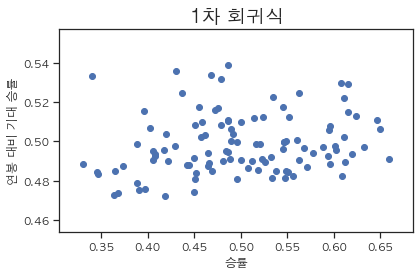

In [128]:
# y - ypred
y_pred = model.predict(x)
plt.scatter(y, y_pred)
plt.xlabel("승률")
plt.ylabel('연봉 대비 기대 승률')
plt.title("1차 회귀식", fontsize = 19)
# gt.set(ylim = (0, 30))

# gt.set_xticklabels(
#     gt.get_xticklabels(),
#     rotation = 45,
#     horizontalalignment = 'right'
# )
# gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

plt.tight_layout()
# plt.savefig('plot/gross.png', dpi = 300)
plt.show()

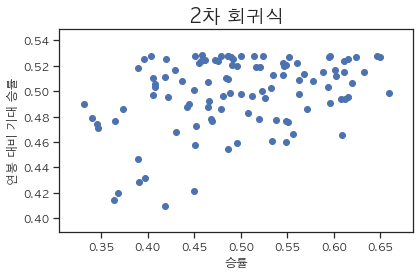

In [130]:
y_pred2 = model2.predict(x2)
plt.scatter(y, y_pred2)
plt.xlabel("승률")
plt.ylabel('연봉 대비 기대 승률')
plt.title("2차 회귀식", fontsize = 19)
# gt.set(ylim = (0, 30))

# gt.set_xticklabels(
#     gt.get_xticklabels(),
#     rotation = 45,
#     horizontalalignment = 'right'
# )
# gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

plt.tight_layout()
# plt.savefig('plot/gross.png', dpi = 300)
plt.show()

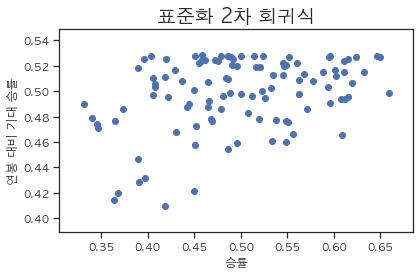

In [167]:
# 표준화 회귀식
y_pred3 = model_reg.predict(output)
plt.scatter(y, y_pred3)
plt.xlabel("승률")
plt.ylabel('연봉 대비 기대 승률')
plt.title("표준화 2차 회귀식", fontsize = 19)
# gt.set(ylim = (0, 30))

# gt.set_xticklabels(
#     gt.get_xticklabels(),
#     rotation = 45,
#     horizontalalignment = 'right'
# )
# gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

plt.tight_layout()
# plt.savefig('plot/gross.png', dpi = 300)
plt.show()

Text(0, 0.5, '승률')

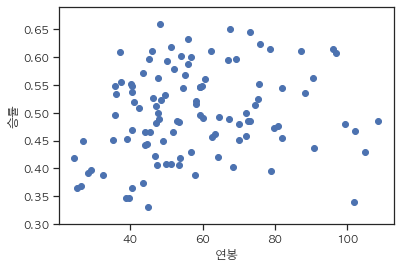

In [125]:
# x - y 산점도
plt.scatter(x['pay'], y)
plt.xlabel("연봉")
plt.ylabel('승률')

In [168]:
print(model.intercept_)
print(model.coef_)
print(model2.intercept_)
print(model2.coef_)
print(model_reg.intercept_)
print(model_reg.coef_)
# yhat = 0.255 + 0.0076x - 0.000053x^2

0.4527478246305907
[0.00079343]
0.2546907203341459
[ 7.64589335e-03 -5.34533572e-05]
0.5180268241906949
[ 0.02798602 -0.01942819]


In [169]:
# R^2. 1차: 0.037, 2차: 0.127, 3차까지 하면 0.129
print(model.score(x, y))
print(model2.score(x2, y)) # 0.12..
print(model_reg.score(output, y))

0.036578571675970784
0.1266196293597226
0.1266196293597226


In [161]:
# 상관계수. 1차: 0.19, 2차: 0.356, 3차: 0.358
pd.DataFrame({"y": y, "y_pred": y_pred2}).corr()

,y,y_pred
y,1.000000,0.355837
y_pred,0.355837,1.000000


In [141]:
residual = y - y_pred2
residual

107    0.119323
145    0.089651
233    0.084257
80     0.024750
87    -0.013601
         ...   
210   -0.002669
256    0.025344
26    -0.020427
222   -0.035012
69    -0.111540
Name: 승률, Length: 108, dtype: float64

In [88]:
# WAR과 승수 편차 보기. 144경기 기준
df['승/144'] = df['승'] / df['G'] * 144
df['war/144'] = df['war'] / df['G'] * 144
df['win-war'] = df['승/144'] - df['war/144']

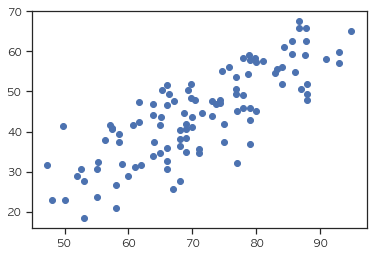

In [90]:
plt.scatter(df['승/144'], df['war/144'])

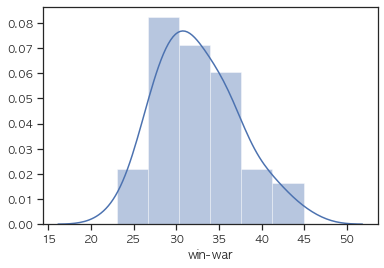

In [142]:
sns.distplot(df[df['G'] == 144]['win-war']) # 30-35에 많음

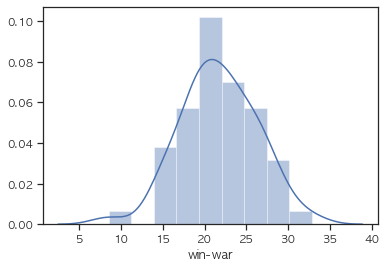

In [143]:
sns.distplot(df[df['G'] != 144]['win-war']) # 20에 많음

In [79]:
# 승-war 평균 이상 -> 시너지를 잘 내서 성적이 좋음?
# 승-war이 작은 팀 -> 시너지를 못 냄?
# 아님. 단지 경기수 차이. 경기수 별로 비교?
df['win-war'].describe()

count    108.000000
mean      26.716858
std        7.111838
min        8.510075
25%       21.353705
50%       26.775338
75%       31.462500
max       44.910000
Name: win-war, dtype: float64

In [174]:
df.columns

Index(['팀', '연도', '선수 수', '총액(억)', '평균(억)', 'crowd', 'avg_crowd', 'size', '순',
       'G', '승', '패', '무', '승차', '승률', 'rank_bat', 'war_batting', 'rank_pit',
       'war_pitching', 'war', '승/144', 'war/144', 'win-war'],
      dtype='object')

In [175]:
# win-war 상위
temp = df.sort_values(by='win-war', ascending=False)
temp.head(10) # 전부 144경기 시절.

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,승차,승률,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0,3,144,...,1.5,0.535,9,12.22,2,19.87,32.09,77.0,32.09,44.91
80,LG,2019,51.0,75.52,1.348571,1000400,13894,24411.0,4,144,...,9.0,0.552,5,21.84,5,14.99,36.83,79.0,36.83,42.17
33,KIA,2015,NaN,44.04,NaN,710141,9863,20500.0,7,144,...,21.0,0.465,10,5.51,4,20.09,25.60,67.0,25.60,41.40
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0,6,144,...,20.0,0.472,8,15.68,10,11.91,27.59,68.0,27.59,40.41
217,삼성,2015,NaN,87.32,NaN,524971,7291,10000.0,1,144,...,-,0.611,1,33.76,8,14.06,47.82,88.0,47.82,40.18
107,SK,2019,53.0,96.15,1.814151,982962,13652,23000.0,1,144,...,-,0.615,6,19.10,1,30.31,49.41,88.0,49.41,38.59
105,SK,2017,51.0,75.30,1.476471,892541,12396,23000.0,5,144,...,12.0,0.524,5,20.13,6,17.22,37.35,75.0,37.35,37.65
86,NC,2018,50.0,53.39,1.067800,442872,6151,22112.0,10,144,...,20.0,0.406,10,9.66,10,11.15,20.81,58.0,20.81,37.19
35,KIA,2017,57.0,96.84,1.698947,1024830,14234,20500.0,1,144,...,-,0.608,2,31.23,3,19.33,50.56,87.0,50.56,36.44
77,LG,2016,57.0,71.97,1.262632,1157646,16078,24411.0,4,144,...,21.5,0.500,7,20.29,6,14.32,34.61,71.0,34.61,36.39


In [176]:
# win-war 하위
temp.tail(10) # 전부 128-133경기 시절. 차이 왜 이렇게 적지?

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,승차,승률,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war
28,KIA,2010,NaN,44.68,NaN,436285,6512,12400.0,5,133,...,26.0,0.444,6,19.55,3,23.68,43.23,63.879699,46.805414,17.074286
140,두산,2014,NaN,51.83,NaN,1128298,17630,24411.0,6,128,...,20.0,0.465,3,26.85,7,16.98,43.83,66.375000,49.308750,17.066250
260,한화,2012,NaN,50.02,NaN,519794,7758,13042.0,8,133,...,26.5,0.408,6,22.28,8,15.31,37.59,57.383459,40.698947,16.684511
31,KIA,2013,NaN,51.19,NaN,470526,7352,12400.0,8,128,...,23.5,0.408,6,22.70,8,13.69,36.39,57.375000,40.938750,16.436250
261,한화,2013,NaN,44.84,NaN,386893,6045,13042.0,9,128,...,33.5,0.331,8,16.56,9,11.65,28.21,47.250000,31.736250,15.513750
222,키움,2008,NaN,29.12,NaN,258077,4096,12500.0,7,126,...,33.0,0.397,6,17.87,6,18.67,36.54,57.142857,41.760000,15.382857
178,롯데,2014,NaN,62.66,NaN,830820,12982,24500.0,7,128,...,21.0,0.457,5,23.49,5,21.29,44.78,65.250000,50.377500,14.872500
137,두산,2011,NaN,45.49,NaN,1253735,18712,24411.0,5,133,...,19.0,0.466,3,28.00,5,19.64,47.64,66.045113,51.580150,14.464962
73,LG,2012,NaN,44.10,NaN,1259480,18798,24411.0,7,133,...,22.0,0.442,5,23.42,5,20.38,43.80,61.714286,47.422556,14.291729
257,한화,2009,NaN,39.64,NaN,375589,5691,13042.0,8,133,...,35.5,0.346,5,23.48,6,14.66,38.14,49.804511,41.294436,8.510075


In [171]:
# 2015년(~19)부터 144경기.
df[df['G'] == 144]['연도'].min()

2015

In [177]:
# 가장 고효율 팀: war/연봉이 가장 작은 팀.
df['연봉/war'] = df['war/144'] / df['총액(억)']
df['연봉/승'] = df['승/144'] / 

In [178]:
df.sort_values(by='war/연봉', ascending=False).head(10)

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war,war/연봉,승/연봉
183,롯데,2019,54.0,101.83,1.958269,679208,9433,24500.0,10,144,...,10,10.91,8,11.97,22.88,48.0,22.88,25.12,4.450612,2.097902
265,한화,2017,57.0,105.05,1.842982,593251,8240,13042.0,8,144,...,7,17.46,8,13.70,31.16,61.0,31.16,29.84,3.371309,1.957638
219,삼성,2017,57.0,78.94,1.384912,704857,9790,24331.0,9,144,...,8,16.82,10,6.78,23.60,55.0,23.60,31.40,3.344915,2.330508
264,한화,2016,57.0,102.10,1.791228,660472,9173,13042.0,7,144,...,9,17.49,7,13.12,30.61,66.0,30.61,35.39,3.335511,2.156158
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0,6,144,...,8,15.68,10,11.91,27.59,68.0,27.59,40.41,2.888365,2.464661
37,KIA,2019,54.0,90.88,1.781961,692163,9613,20500.0,7,144,...,7,17.66,6,14.08,31.74,62.0,31.74,30.26,2.863264,1.953371
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0,3,144,...,9,12.22,2,19.87,32.09,77.0,32.09,44.91,2.753817,2.399501
86,NC,2018,50.0,53.39,1.067800,442872,6151,22112.0,10,144,...,10,9.66,10,11.15,20.81,58.0,20.81,37.19,2.565593,2.787122
267,한화,2019,53.0,68.34,1.366800,555225,7711,13042.0,9,144,...,9,14.98,9,11.74,26.72,58.0,26.72,31.28,2.557635,2.170659
36,KIA,2018,54.0,108.65,2.012000,861729,11968,20500.0,5,144,...,2,26.96,7,16.61,43.57,70.0,43.57,26.43,2.493688,1.606610


In [179]:
df.sort_values(by='승/연봉', ascending=False).head(10)

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war,war/연봉,승/연봉
39,KT,2016,52.0,43.52,0.836923,682444,9478,22067.0,10,144,...,10,9.51,10,8.82,18.33,53.0,18.33,34.67,2.374250,2.891435
86,NC,2018,50.0,53.39,1.067800,442872,6151,22112.0,10,144,...,10,9.66,10,11.15,20.81,58.0,20.81,37.19,2.565593,2.787122
33,KIA,2015,NaN,44.04,NaN,710141,9863,20500.0,7,144,...,10,5.51,4,20.09,25.60,67.0,25.60,41.40,1.720312,2.617188
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0,6,144,...,8,15.68,10,11.91,27.59,68.0,27.59,40.41,2.888365,2.464661
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0,3,144,...,9,12.22,2,19.87,32.09,77.0,32.09,44.91,2.753817,2.399501
219,삼성,2017,57.0,78.94,1.384912,704857,9790,24331.0,9,144,...,8,16.82,10,6.78,23.60,55.0,23.60,31.40,3.344915,2.330508
40,KT,2017,53.0,38.94,0.734717,686541,9535,22067.0,10,144,...,10,9.68,9,13.18,22.86,50.0,22.86,27.14,1.703412,2.187227
267,한화,2019,53.0,68.34,1.366800,555225,7711,13042.0,9,144,...,9,14.98,9,11.74,26.72,58.0,26.72,31.28,2.557635,2.170659
264,한화,2016,57.0,102.10,1.791228,660472,9173,13042.0,7,144,...,9,17.49,7,13.12,30.61,66.0,30.61,35.39,3.335511,2.156158
80,LG,2019,51.0,75.52,1.348571,1000400,13894,24411.0,4,144,...,5,21.84,5,14.99,36.83,79.0,36.83,42.17,2.050502,2.144990


In [180]:
승

NameError: name '승' is not defined